In [1]:
%pip install setuptools
%pip install spicy
%pip install plotly
%pip install seaborn
%pip install nbformat
%pip install scikit-learn 
%pip install imblearn

In [2]:
#----main libraries----
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#----plotting libraries----
import seaborn as sns
import matplotlib.pyplot as plt

#----model and support imports----
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

import matplotlib.ticker as mtick

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score

from sklearn.preprocessing import StandardScaler


In [3]:
tel_cus_df = pd.read_csv("telco.csv")


In [4]:
tel_cus_df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [5]:
tel_cus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Total charges is type object. Check for empty values and covert to a numeric data type

tel_cus_df['TotalCharges'] = tel_cus_df['TotalCharges'].replace(' ', np.nan, regex=True)
tel_cus_df['TotalCharges'] = pd.to_numeric(tel_cus_df['TotalCharges'])
tel_cus_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
columns = tel_cus_df.columns
print("----------- Numeric field ----------\n")
for i in range(len(columns)):
    if tel_cus_df[columns[i]].dtypes!=object:
        print("unique number of {} ---> {}".format(columns[i], len(tel_cus_df[columns[i]].unique())))
        
print("\n---------- Categorical field ----------\n")
for i in range(len(columns)):
    if tel_cus_df[columns[i]].dtypes==object:
        print("unique number of {} ---> {}".format(columns[i], len(tel_cus_df[columns[i]].unique())))

----------- Numeric field ----------

unique number of SeniorCitizen ---> 2
unique number of tenure ---> 73
unique number of MonthlyCharges ---> 1585
unique number of TotalCharges ---> 6531

---------- Categorical field ----------

unique number of customerID ---> 7043
unique number of gender ---> 2
unique number of Partner ---> 2
unique number of Dependents ---> 2
unique number of PhoneService ---> 2
unique number of MultipleLines ---> 3
unique number of InternetService ---> 3
unique number of OnlineSecurity ---> 3
unique number of OnlineBackup ---> 3
unique number of DeviceProtection ---> 3
unique number of TechSupport ---> 3
unique number of StreamingTV ---> 3
unique number of StreamingMovies ---> 3
unique number of Contract ---> 3
unique number of PaperlessBilling ---> 2
unique number of PaymentMethod ---> 4
unique number of Churn ---> 2


In [8]:
tel_cus_df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [9]:
# Removing the missing values
tel_cus_df.dropna(inplace=True)
tel_cus_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
tel_cus_df=tel_cus_df.reset_index(drop=True)
tel_cus_df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7027  6840-RESVB    Male              0     Yes        Yes      24   
7028  2234-XADUH  Female              0     Yes        Yes      72   
7029  4801-JZAZL  Female              0     Yes        Yes      11   
7030  8361-LTMKD    Male              1     Yes         No       4   
7031  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7027          Yes               Yes             DSL            Yes  ...   
7028          Yes               Yes     Fiber optic             No  ...   
7029           No  No phone service             DSL            Yes  ...   
7030          Yes               Yes     Fiber optic             No  ...   
7031          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7027              Yes         Yes         Yes             Yes        One year   
7028              Yes          No         Yes             Yes        One year   
7029               No          No          No              No  Month-to-month   
7030               No          No          No              No  Month-to-month   
7031              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7027              Yes               Mailed check          84.80       1990.50   
7028              Yes    Credit card (automatic)         103.20       7362.90   
7029              Yes           Electronic check          29.60        346.45   
7030              Yes               Mailed check          74.40        306.60   
7031              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7027     No  
7028     No  
7029     No  
7030    Yes  
7031     No  

[7032 rows x 21 columns]

<AxesSubplot:xlabel='MonthlyCharges'>

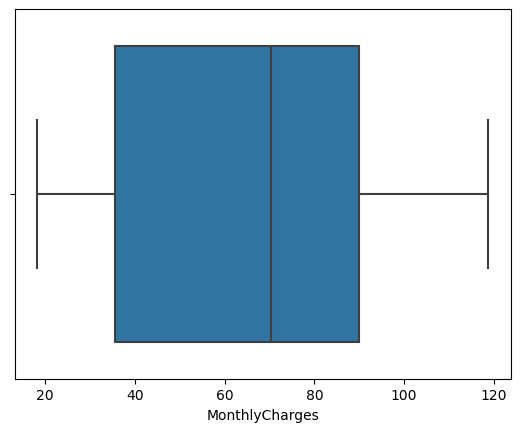

In [11]:
sns.boxplot(x=tel_cus_df.MonthlyCharges)

<AxesSubplot:xlabel='tenure'>

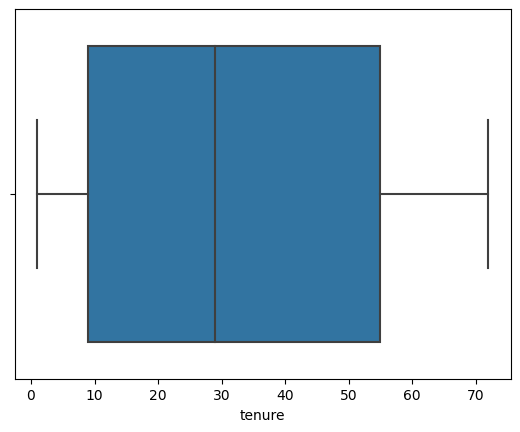

In [12]:
sns.boxplot(x=tel_cus_df.tenure)

<AxesSubplot:xlabel='TotalCharges'>

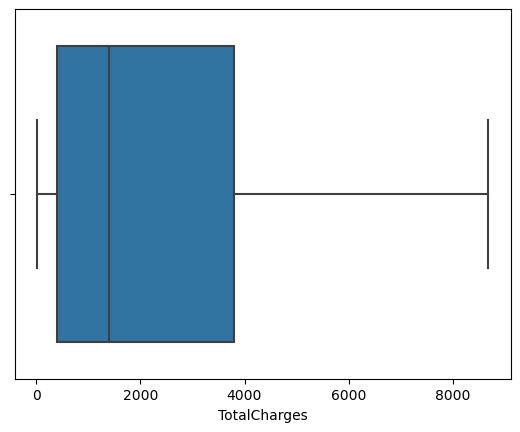

In [13]:
sns.boxplot(x=tel_cus_df.TotalCharges)

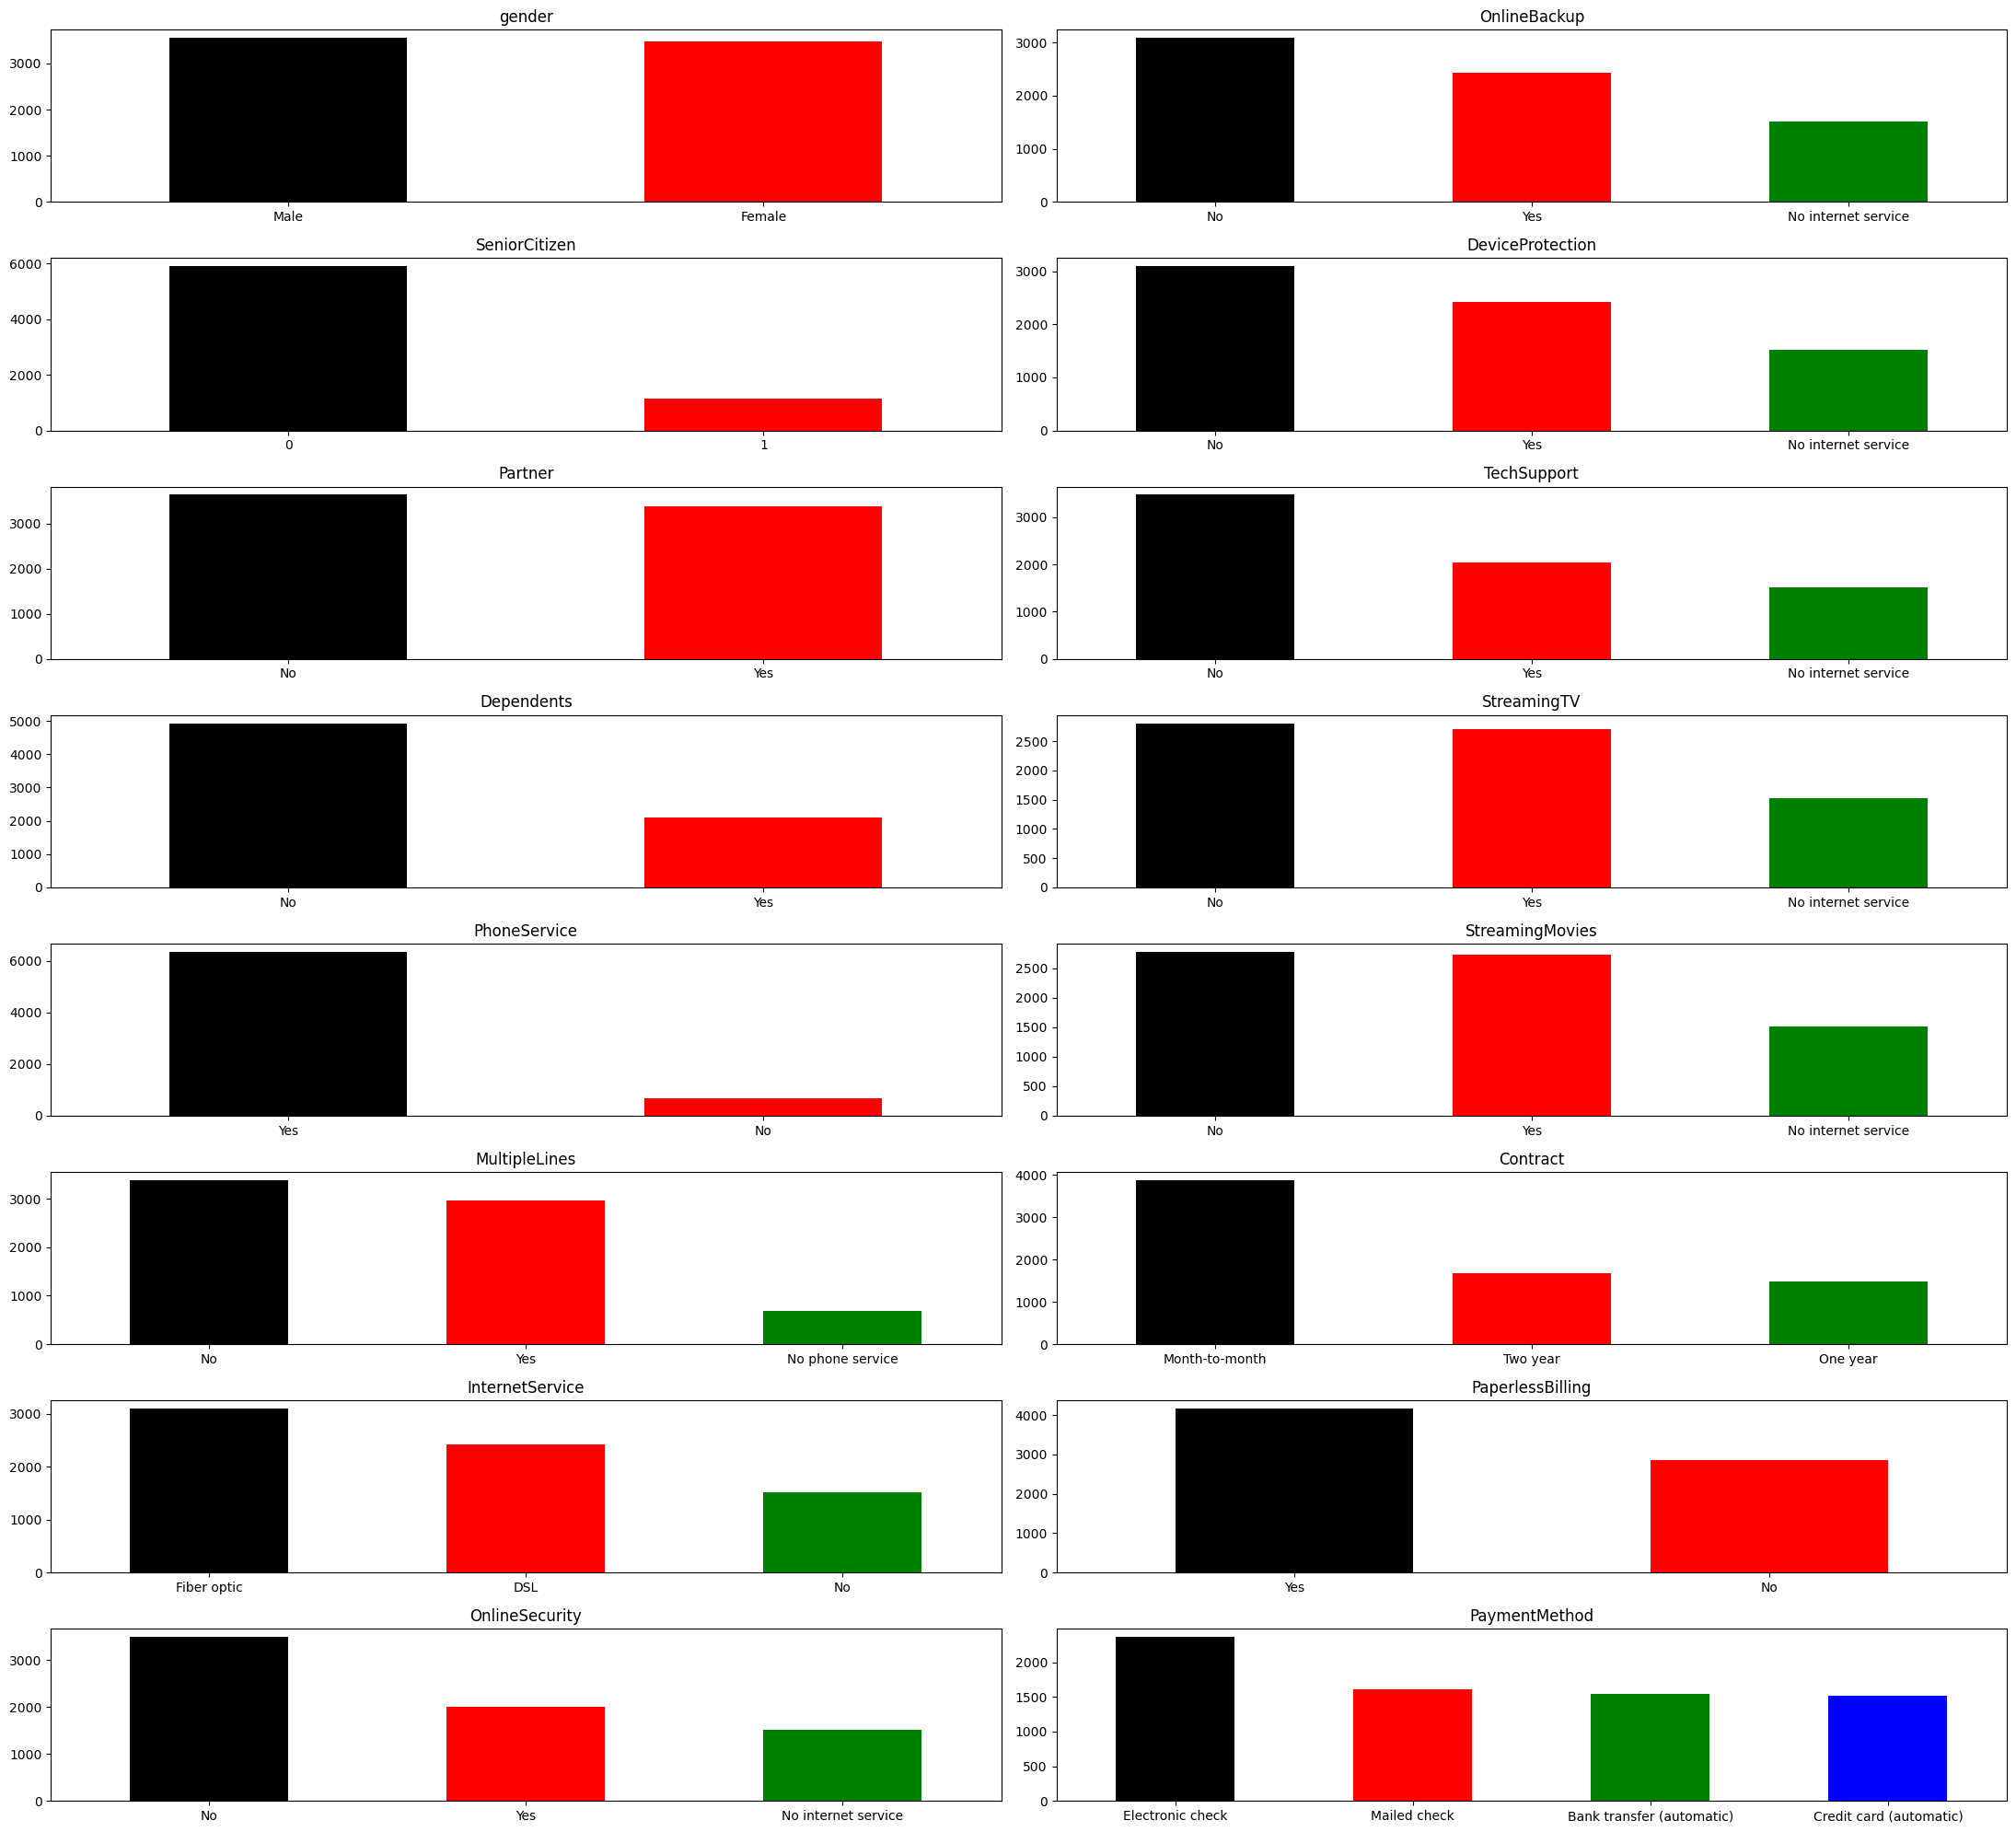

In [14]:
# visualizing data

attributes = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']
fig, axes = plt.subplots(nrows = 8, ncols = 2, figsize = (22,20))
for i, item in enumerate(attributes):
        if i < 8:
            ax = tel_cus_df[item].value_counts().plot(kind= 'bar', ax=axes[i,0], rot =0, color=['black', 'red', 'green', 'blue', 'cyan'])
        elif i >= 8:
            ax = tel_cus_df[item].value_counts().plot(kind= 'bar', ax=axes[i-8,1], rot =0, color=['black', 'red', 'green', 'blue', 'cyan'])
        ax.set_title(item)
        fig.tight_layout()

In [15]:
# A lot of fields seem to have data quality issues (i.e. no internet service instead of just yes or no). Let's explore these further

tel_cus_df.loc[tel_cus_df['OnlineSecurity'] == "No internet service", :].head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
11  7469-LKBCI    Male              0      No         No      16          Yes   
16  8191-XWSZG  Female              0      No         No      52          Yes   
21  1680-VDCWW    Male              0     Yes         No      12          Yes   
22  1066-JKSGK    Male              0      No         No       1          Yes   
33  7310-EGVHZ    Male              0      No         No       1          Yes   

   MultipleLines InternetService       OnlineSecurity  ...  \
11            No              No  No internet service  ...   
16            No              No  No internet service  ...   
21            No              No  No internet service  ...   
22            No              No  No internet service  ...   
33            No              No  No internet service  ...   

       DeviceProtection          TechSupport          StreamingTV  \
11  No internet service  No internet service  No internet service   
16  No internet service  No internet service  No internet service   
21  No internet service  No internet service  No internet service   
22  No internet service  No internet service  No internet service   
33  No internet service  No internet service  No internet service   

        StreamingMovies        Contract PaperlessBilling  \
11  No internet service        Two year               No   
16  No internet service        One year               No   
21  No internet service        One year               No   
22  No internet service  Month-to-month               No   
33  No internet service  Month-to-month               No   

                PaymentMethod MonthlyCharges  TotalCharges  Churn  
11    Credit card (automatic)          18.95        326.80     No  
16               Mailed check          20.65       1022.95     No  
21  Bank transfer (automatic)          19.80        202.25     No  
22               Mailed check          20.15         20.15    Yes  
33  Bank transfer (automatic)          20.20         20.20     No  

[5 rows x 21 columns]

No     5163
Yes    1869
Name: Churn, dtype: int64

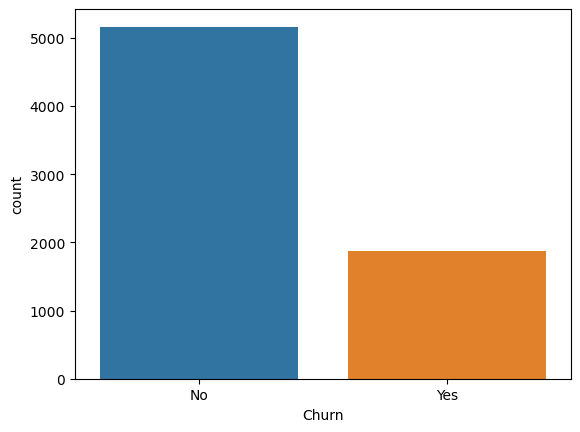

In [16]:
# The data seems to be okay as that is a separate category whereby a user does not have downstream services as it does not have internet service

# Lets explore churn as that is the value that we need to predict

sns.countplot(x = "Churn", data = tel_cus_df)
tel_cus_df.loc[:, 'Churn'].value_counts()

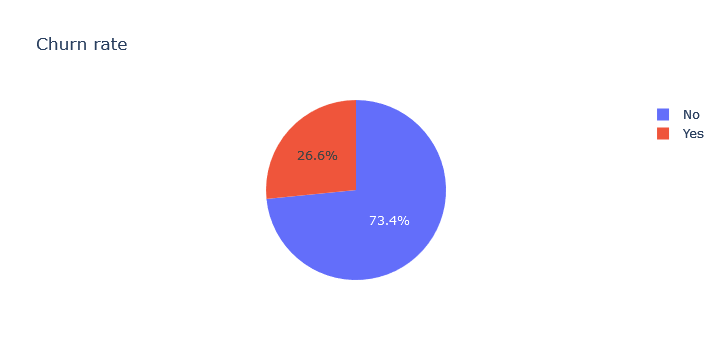

In [17]:
fig = px.pie(tel_cus_df.groupby(['Churn'])['customerID'].count().reset_index(), 
             values='customerID', 
            names='Churn',
           
            title = 'Churn rate ')
            
fig.show()

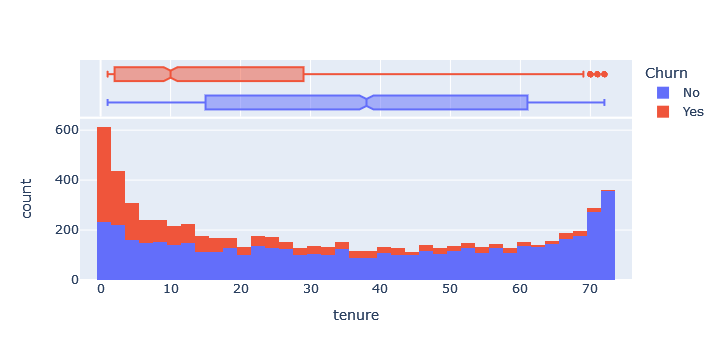

In [18]:
fig = px.histogram(tel_cus_df, x="tenure", color="Churn",marginal="box" )
fig.show()

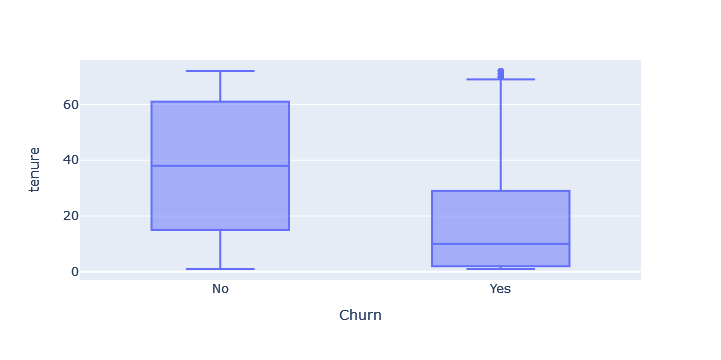

In [19]:
# Create the box plot using plotly express
fig = px.box(tel_cus_df, x="Churn", y="tenure")

# Show the plot
fig.show()

In [20]:
tel_cus_df.groupby('Churn')['tenure'].quantile([.50,.75,.90,.95])

Churn      
No     0.50    38.0
       0.75    61.0
       0.90    71.0
       0.95    72.0
Yes    0.50    10.0
       0.75    29.0
       0.90    51.0
       0.95    60.0
Name: tenure, dtype: float64

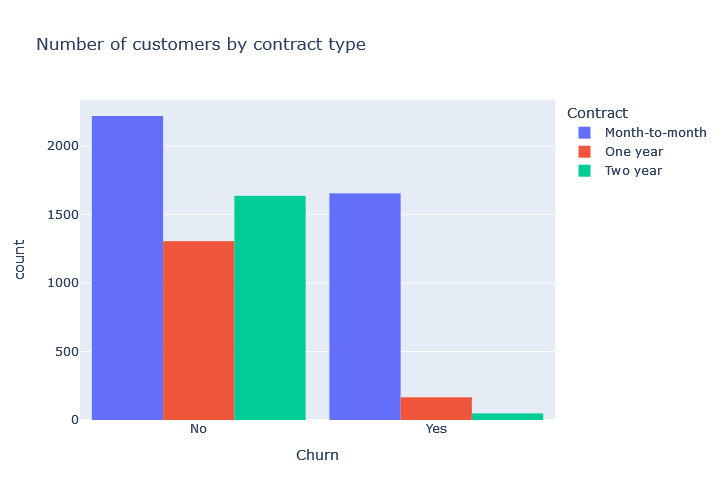

In [21]:
fig = px.histogram(tel_cus_df, x="Churn", color="Contract", barmode="group",
                   title="Number of customers by contract type")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

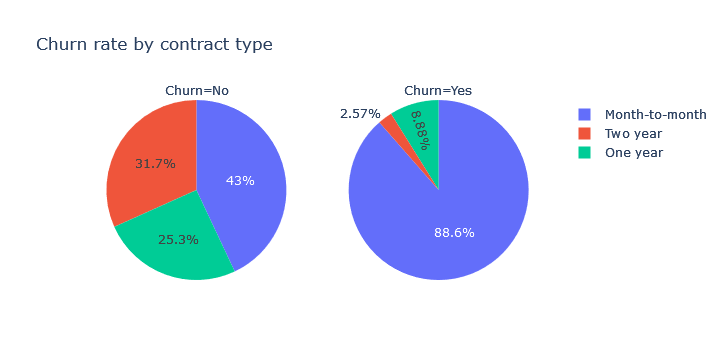

In [22]:
fig = px.pie(tel_cus_df.groupby(['Contract','Churn'])['customerID'].count().reset_index(), 
             values='customerID', 
            names='Contract',
            facet_col = 'Churn',
            title = 'Churn rate by contract type')
            
fig.show()

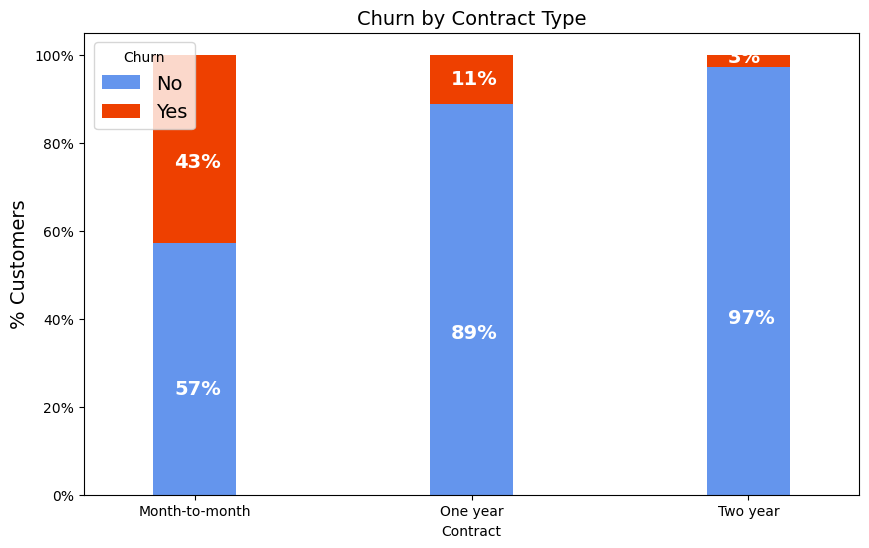

In [23]:
colors=['#6495ED','#EE4000']
contract_churn = tel_cus_df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

In [24]:
tel_cus_df.groupby(['Contract','Churn'])['tenure'].mean()

Contract        Churn
Month-to-month  No       21.033333
                Yes      14.016918
One year        No       41.705972
                Yes      44.963855
Two year        No       56.948687
                Yes      61.270833
Name: tenure, dtype: float64

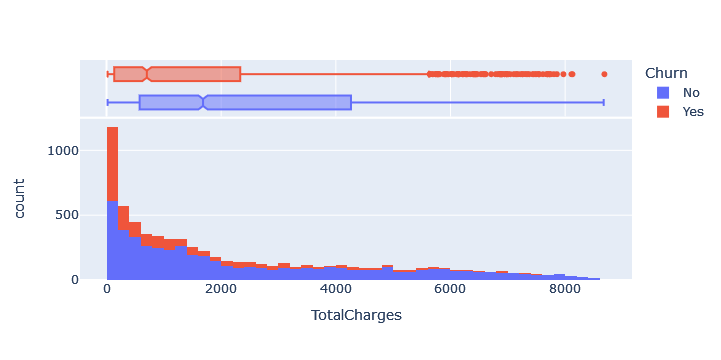

In [25]:
fig = px.histogram(tel_cus_df, x="TotalCharges", color="Churn",
                   marginal="box"
                  )
fig.show()


<ipython-input-26-42292d852c3f>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-26-42292d852c3f>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Distribution of monthly charges by churn')

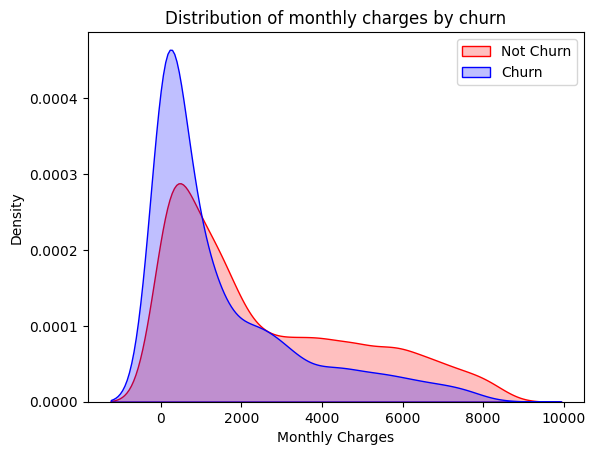

In [26]:
ax = sns.kdeplot(tel_cus_df.TotalCharges[(tel_cus_df["Churn"] == 'No') ],
                color="red", shade = True)
ax = sns.kdeplot(tel_cus_df.TotalCharges[(tel_cus_df["Churn"] == 'Yes') ],
                ax =ax, color="blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

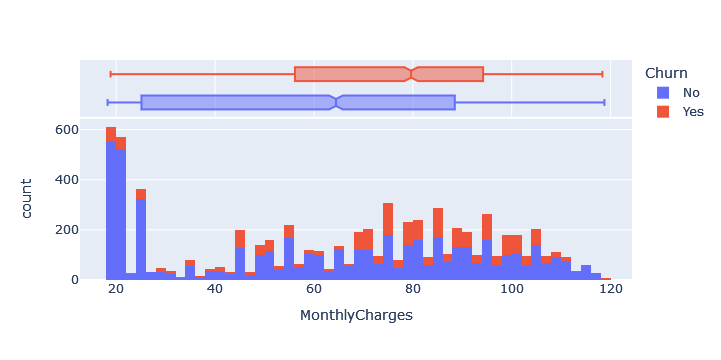

In [27]:
fig = px.histogram(tel_cus_df, x="MonthlyCharges", color="Churn",
                   marginal="box"
                  )
fig.show()

<ipython-input-28-817b0b3925c9>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-28-817b0b3925c9>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Distribution of monthly charges by churn')

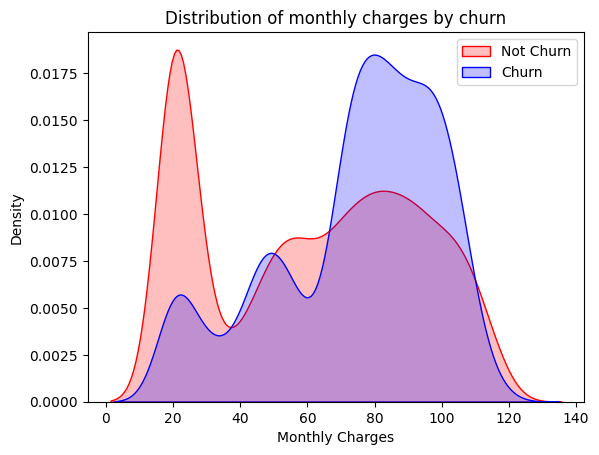

In [28]:
ax = sns.kdeplot(tel_cus_df.MonthlyCharges[(tel_cus_df["Churn"] == 'No') ],
                color="red", shade = True)
ax = sns.kdeplot(tel_cus_df.MonthlyCharges[(tel_cus_df["Churn"] == 'Yes') ],
                ax =ax, color="blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

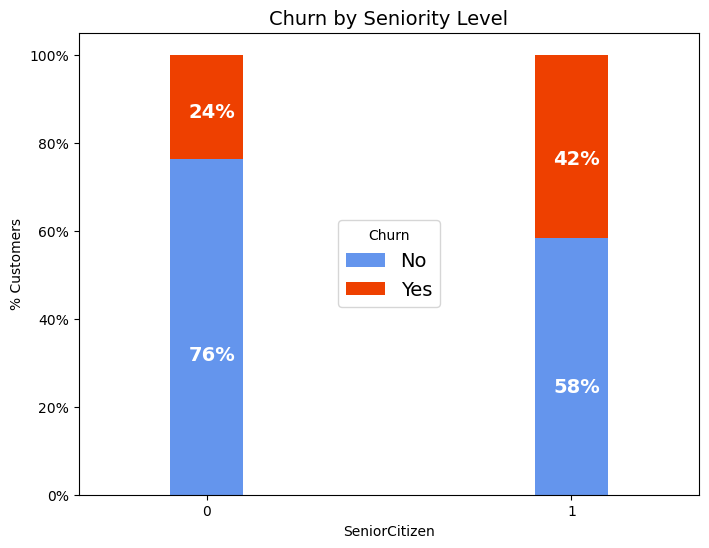

In [29]:
colors=['#6495ED','#EE4000']
seniority_churn = tel_cus_df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

In [30]:
corr_df = tel_cus_df.copy()
corr_df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
corr_df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [31]:
tel_cus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


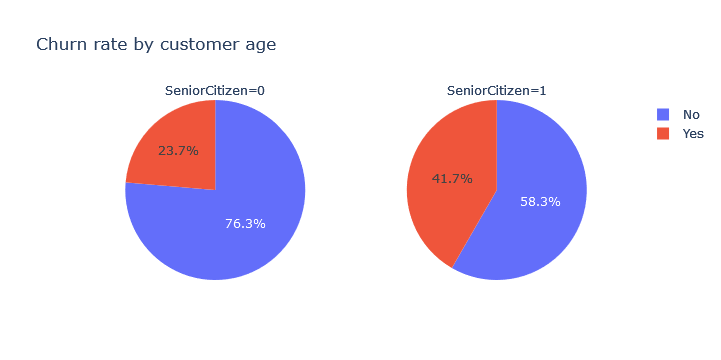

In [32]:
#Now let's look at the age (the senior citizen or not), as well as the client has a partner and dependents or not.
fig = px.pie(tel_cus_df.groupby(['SeniorCitizen','Churn'])['customerID'].count().reset_index(), 
            values='customerID', 
            names='Churn',
            facet_col = 'SeniorCitizen',
            color = 'Churn',
            title = 'Churn rate by customer age')

fig.show()

In [33]:
df_dummies = pd.get_dummies(corr_df[['Churn','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection'
                                 ,'TechSupport', 'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']])
df_dummies.head()

Churn  gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  \
0      0              1            0           0            1              1   
1      0              0            1           1            0              1   
2      1              0            1           1            0              1   
3      0              0            1           1            0              1   
4      1              1            0           1            0              1   

   Dependents_Yes  PhoneService_No  PhoneService_Yes  MultipleLines_No  ...  \
0               0                1                 0                 0  ...   
1               0                0                 1                 1  ...   
2               0                0                 1                 1  ...   
3               0                1                 0                 0  ...   
4               0                0                 1                 1  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1                  0                    1                     0   
2                  0                    0                     1   
3                  0                    1                     0   
4                  0                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 42 columns]

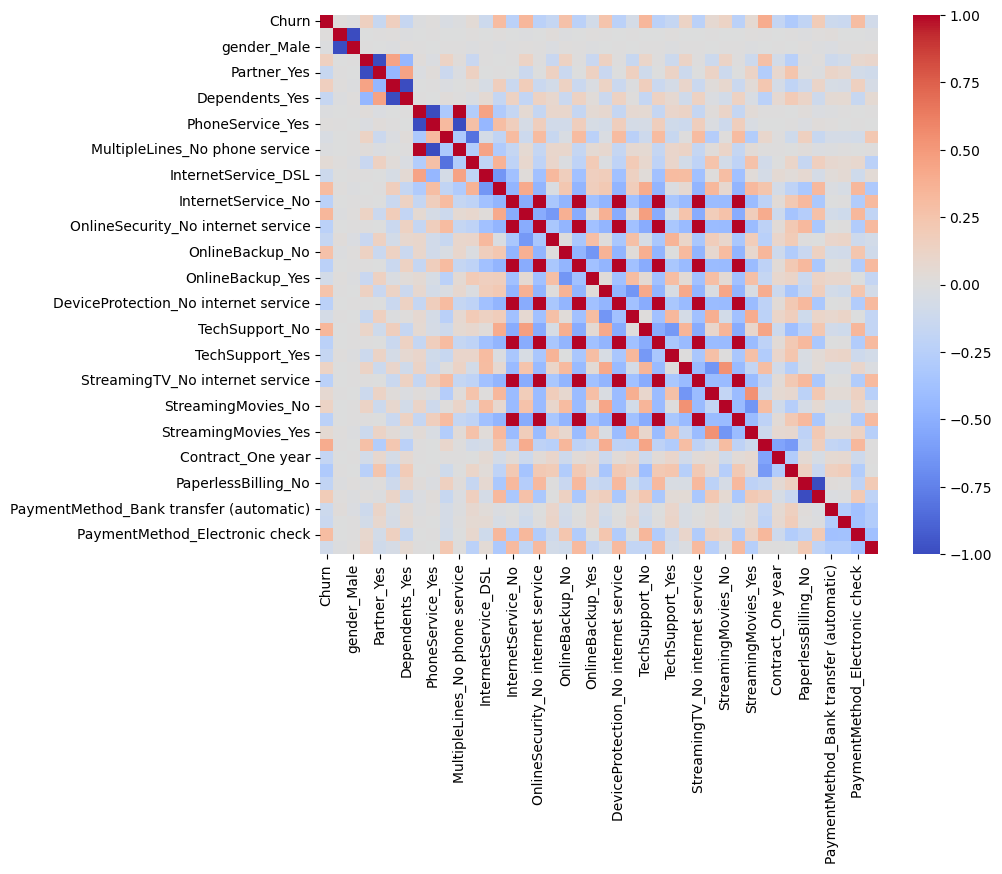

In [34]:
plt.figure(figsize=(9, 7))
sns.heatmap(df_dummies.corr(), annot=False, cmap='coolwarm')

plt.show()

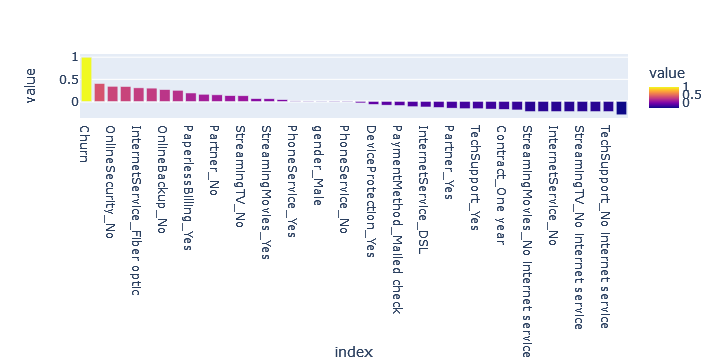

In [35]:
fig = px.bar(df_dummies.corr()['Churn'].sort_values(ascending = False), 
             color = 'value')
fig.show()

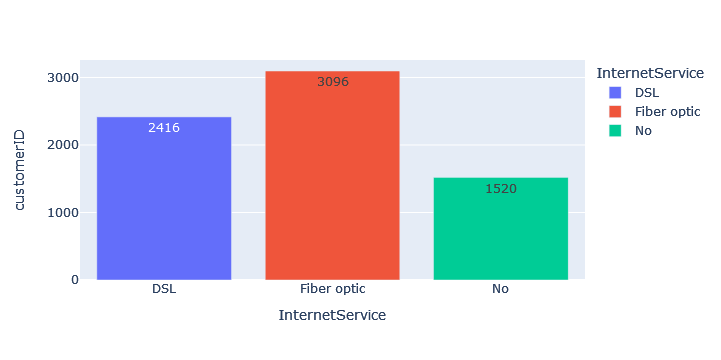

In [36]:
#First, let's see what types of Internet services customers have, and then let's see their impact on the churn rate
fig = px.bar(tel_cus_df.groupby('InternetService')['customerID'].count().reset_index(),
             x='InternetService',
             y='customerID', 
             color = 'InternetService',
             text = 'customerID')
fig.show()


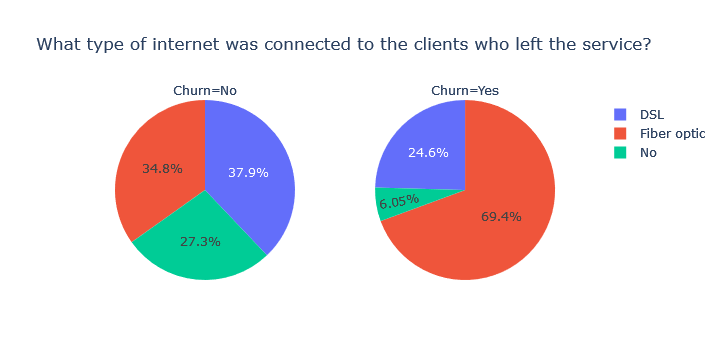

In [37]:
#Let's see what Internet services were used by customers who left the service:
fig = px.pie(tel_cus_df.groupby(['InternetService','Churn'])['customerID'].count().reset_index(), 
             values='customerID', 
             facet_col = 'Churn',
             names='InternetService',
            title = 'What type of internet was connected to the clients who left the service?')
fig.show()

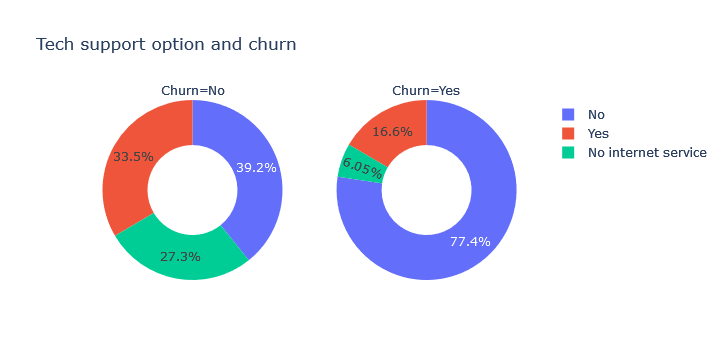

In [38]:
fig = px.pie(tel_cus_df.groupby(['TechSupport','Churn'])['customerID'].count().reset_index(), 
             values='customerID', 
             facet_col = 'Churn',
             hole = .5,
             names='TechSupport',
            title = 'Tech support option and churn')
fig.show()

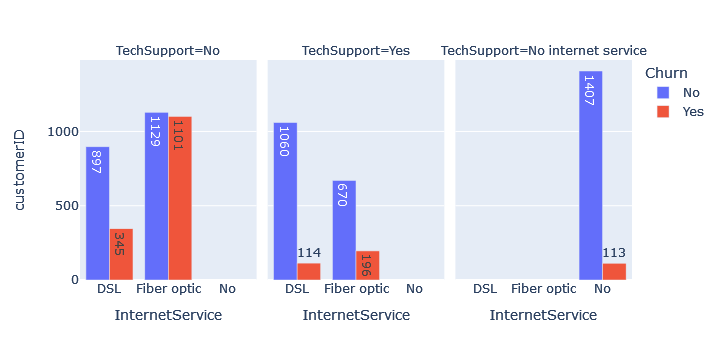

In [39]:
#tech support and online security
fig = px.bar(tel_cus_df.groupby(['InternetService',
                                                'TechSupport',
                                                'Churn'])['customerID'].count().reset_index(),
             x="InternetService",
             y="customerID", 
             color="Churn", 
             text = 'customerID',
             barmode="group",
             facet_col="TechSupport"
            )
fig.show()

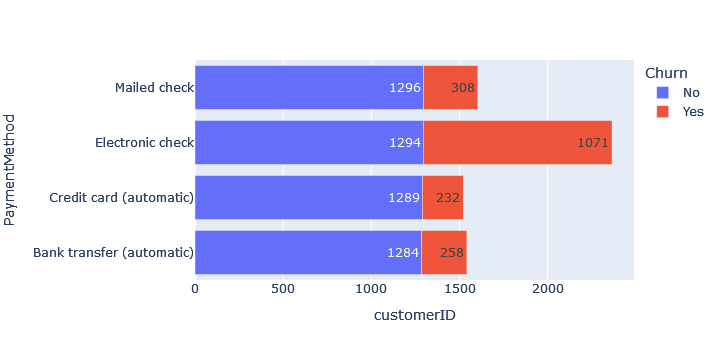

In [40]:
#Let's look at what payment methods customers use and how this affects the churn
fig = px.bar(tel_cus_df.groupby(['PaymentMethod',
                                                'Churn'])['customerID'].count().reset_index(),
             x="customerID",
             y="PaymentMethod", 
             color="Churn", 
             text = 'customerID'
            )
fig.show()

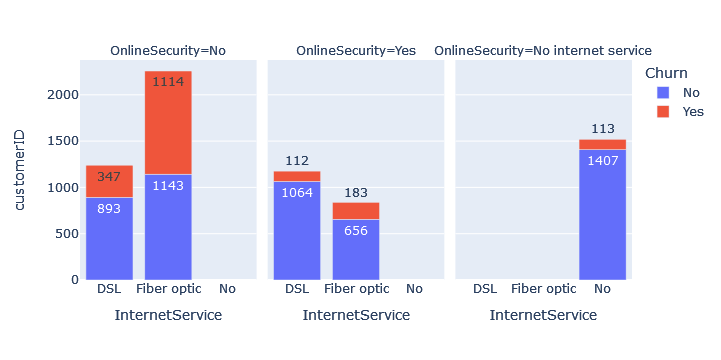

In [41]:
fig = px.bar(tel_cus_df.groupby(['InternetService','OnlineSecurity',
                                                'Churn'])['customerID'].count().reset_index(),
             x="InternetService",
             y="customerID", 
             color="Churn", 
             #barmode="group",
             text = 'customerID',
             facet_col = 'OnlineSecurity'
            )
fig.show()

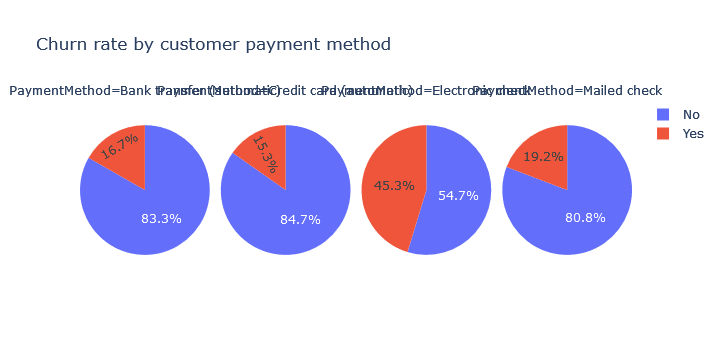

In [42]:
fig = px.pie(tel_cus_df.groupby(['PaymentMethod','Churn'])["customerID"].count().reset_index(), 
            values='customerID', 
            names='Churn',
            facet_col = 'PaymentMethod',
            color = 'Churn',
            title = 'Churn rate by customer payment method')

fig.show()

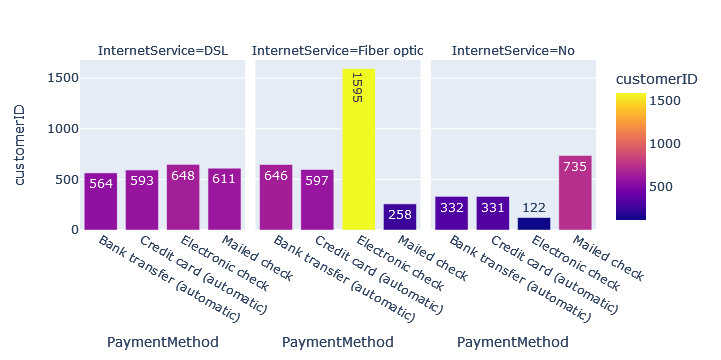

In [43]:
#Let's see if some specific Internet service was used by customers with an electronic check as a means of payment

fig = px.bar(tel_cus_df.groupby(['PaymentMethod','InternetService'])['customerID'].count().reset_index(),
             x='PaymentMethod',
             y='customerID', 
             facet_col = 'InternetService',
             color = 'customerID',
             text = 'customerID')
fig.show()

In [44]:
#Let's see what the churn rate looks like for the Internet service and payment method together:

churn_pm = tel_cus_df.assign(churn_clients = np.where(tel_cus_df['Churn']== 'Yes',tel_cus_df['customerID'],None))\
   .groupby(['PaymentMethod','InternetService']).agg({'churn_clients':'count'}).reset_index()
pm_clients = tel_cus_df.groupby(['PaymentMethod','InternetService'])['customerID'].count().reset_index()
pm_data = pm_clients.join(churn_pm.set_index(['PaymentMethod','InternetService']), on=['PaymentMethod','InternetService'])
pm_data

PaymentMethod InternetService  customerID  churn_clients
0   Bank transfer (automatic)             DSL         564             53
1   Bank transfer (automatic)     Fiber optic         646            187
2   Bank transfer (automatic)              No         332             18
3     Credit card (automatic)             DSL         593             72
4     Credit card (automatic)     Fiber optic         597            151
5     Credit card (automatic)              No         331              9
6            Electronic check             DSL         648            207
7            Electronic check     Fiber optic        1595            849
8            Electronic check              No         122             15
9                Mailed check             DSL         611            127
10               Mailed check     Fiber optic         258            110
11               Mailed check              No         735             71

In [45]:
pm_data['churn_rate,%'] = round(((pm_data['churn_clients']/pm_data['customerID']) * 100),2)

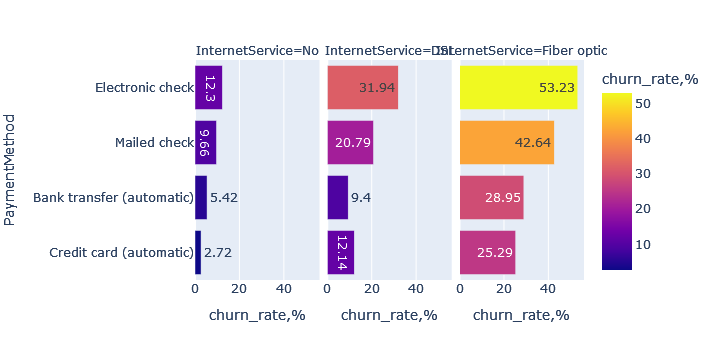

In [46]:
fig = px.bar(pm_data.sort_values('churn_rate,%'),
             x='churn_rate,%',
             y='PaymentMethod',
             facet_col = 'InternetService',
             color = 'churn_rate,%',
             text = 'churn_rate,%')
fig.show()

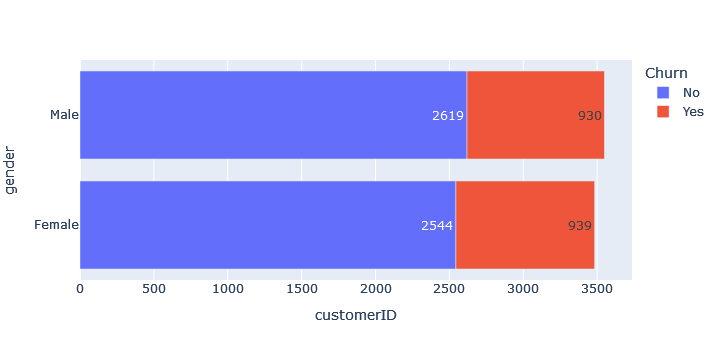

In [47]:
#We have an almost equal number of men and women in the data set. Let's see if there is a difference in the churn rate:
fig = px.bar(tel_cus_df.groupby(['gender',
                                                'Churn'])['customerID'].count().reset_index(),
             x="customerID",
             y="gender", 
             color="Churn", 
             text = 'customerID'
            )
fig.show()

In [48]:
#The churn rate among senior citizens is almost twice as high as among non-senior citizens. However, there are also much fewer such customers.

tel_cus_df.groupby('SeniorCitizen')['customerID'].count()

SeniorCitizen
0    5890
1    1142
Name: customerID, dtype: int64

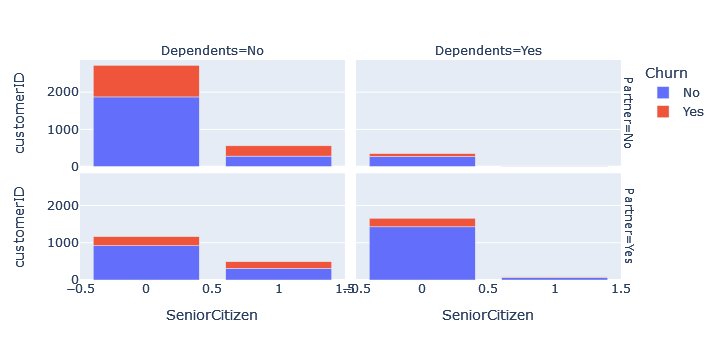

In [49]:
#Impact of having a partner
fig = px.bar(tel_cus_df.groupby(['SeniorCitizen','Partner',
                                        'Dependents','Churn'])['customerID'].count().reset_index(),
             x="SeniorCitizen",
             y="customerID", 
             color="Churn", 
             #barmode="group",
             facet_row="Partner",
             facet_col = 'Dependents'
            )
fig.show()

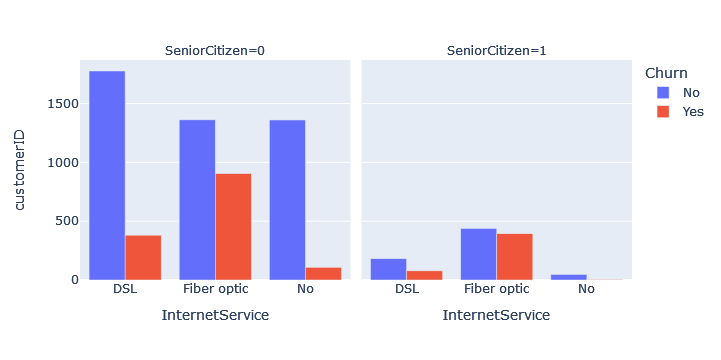

In [50]:
#We see that among senior citizens without a partner and dependants, the churn rate is almost 50%.

#Let's see which services were used by senior citizens and move on to summarizing and building a model for churn prediction.

fig = px.bar(tel_cus_df.groupby(['SeniorCitizen','InternetService','Churn'])['customerID'].count().reset_index(),
             x="InternetService",
             y="customerID", 
             color="Churn", 
             barmode="group",
             facet_col = 'SeniorCitizen'
            )
fig.show()

In [51]:
# Drop CustomerID and other columns not required

tel_cus_df.drop(['customerID'], axis=1, inplace=True)
tel_cus_df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [52]:
# Create a list of column names to encode
columns_to_encode = list(tel_cus_df.select_dtypes(include=['category', 'object']).columns)
columns_to_encode.remove('Churn')

# Perform one-hot encoding on the selected columns
data = pd.get_dummies(tel_cus_df, columns=columns_to_encode, drop_first=True)

In [53]:
data.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges Churn  gender_Male  \
0              0       1           29.85         29.85    No            0   
1              0      34           56.95       1889.50    No            1   
2              0       2           53.85        108.15   Yes            1   
3              0      45           42.30       1840.75    No            1   
4              0       2           70.70        151.65   Yes            0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            1               0                 0   
1            0               0                 1   
2            0               0                 1   
3            0               0                 0   
4            0               0                 1   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                               1  ...                                0   
1                               0  ...                                0   
2                               0  ...                                0   
3                               1  ...                                0   
4                               0  ...                                0   

   StreamingTV_Yes  StreamingMovies_No internet service  StreamingMovies_Yes  \
0                0                                    0                    0   
1                0                                    0                    0   
2                0                                    0                    0   
3                0                                    0                    0   
4                0                                    0                    0   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                  0                  0                     1   
1                  1                  0                     0   
2                  0                  0                     1   
3                  1                  0                     0   
4                  0                  0                     1   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 31 columns]

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   object 
 5   gender_Male                            7032 non-null   uint8  
 6   Partner_Yes                            7032 non-null   uint8  
 7   Dependents_Yes                         7032 non-null   uint8  
 8   PhoneService_Yes                       7032 non-null   uint8  
 9   MultipleLines_No phone service         7032 non-null   uint8  
 10  MultipleLines_Yes                      7032 non-null   uint8  
 11  Inte

<ipython-input-55-fd241d2282cc>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-55-fd241d2282cc>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

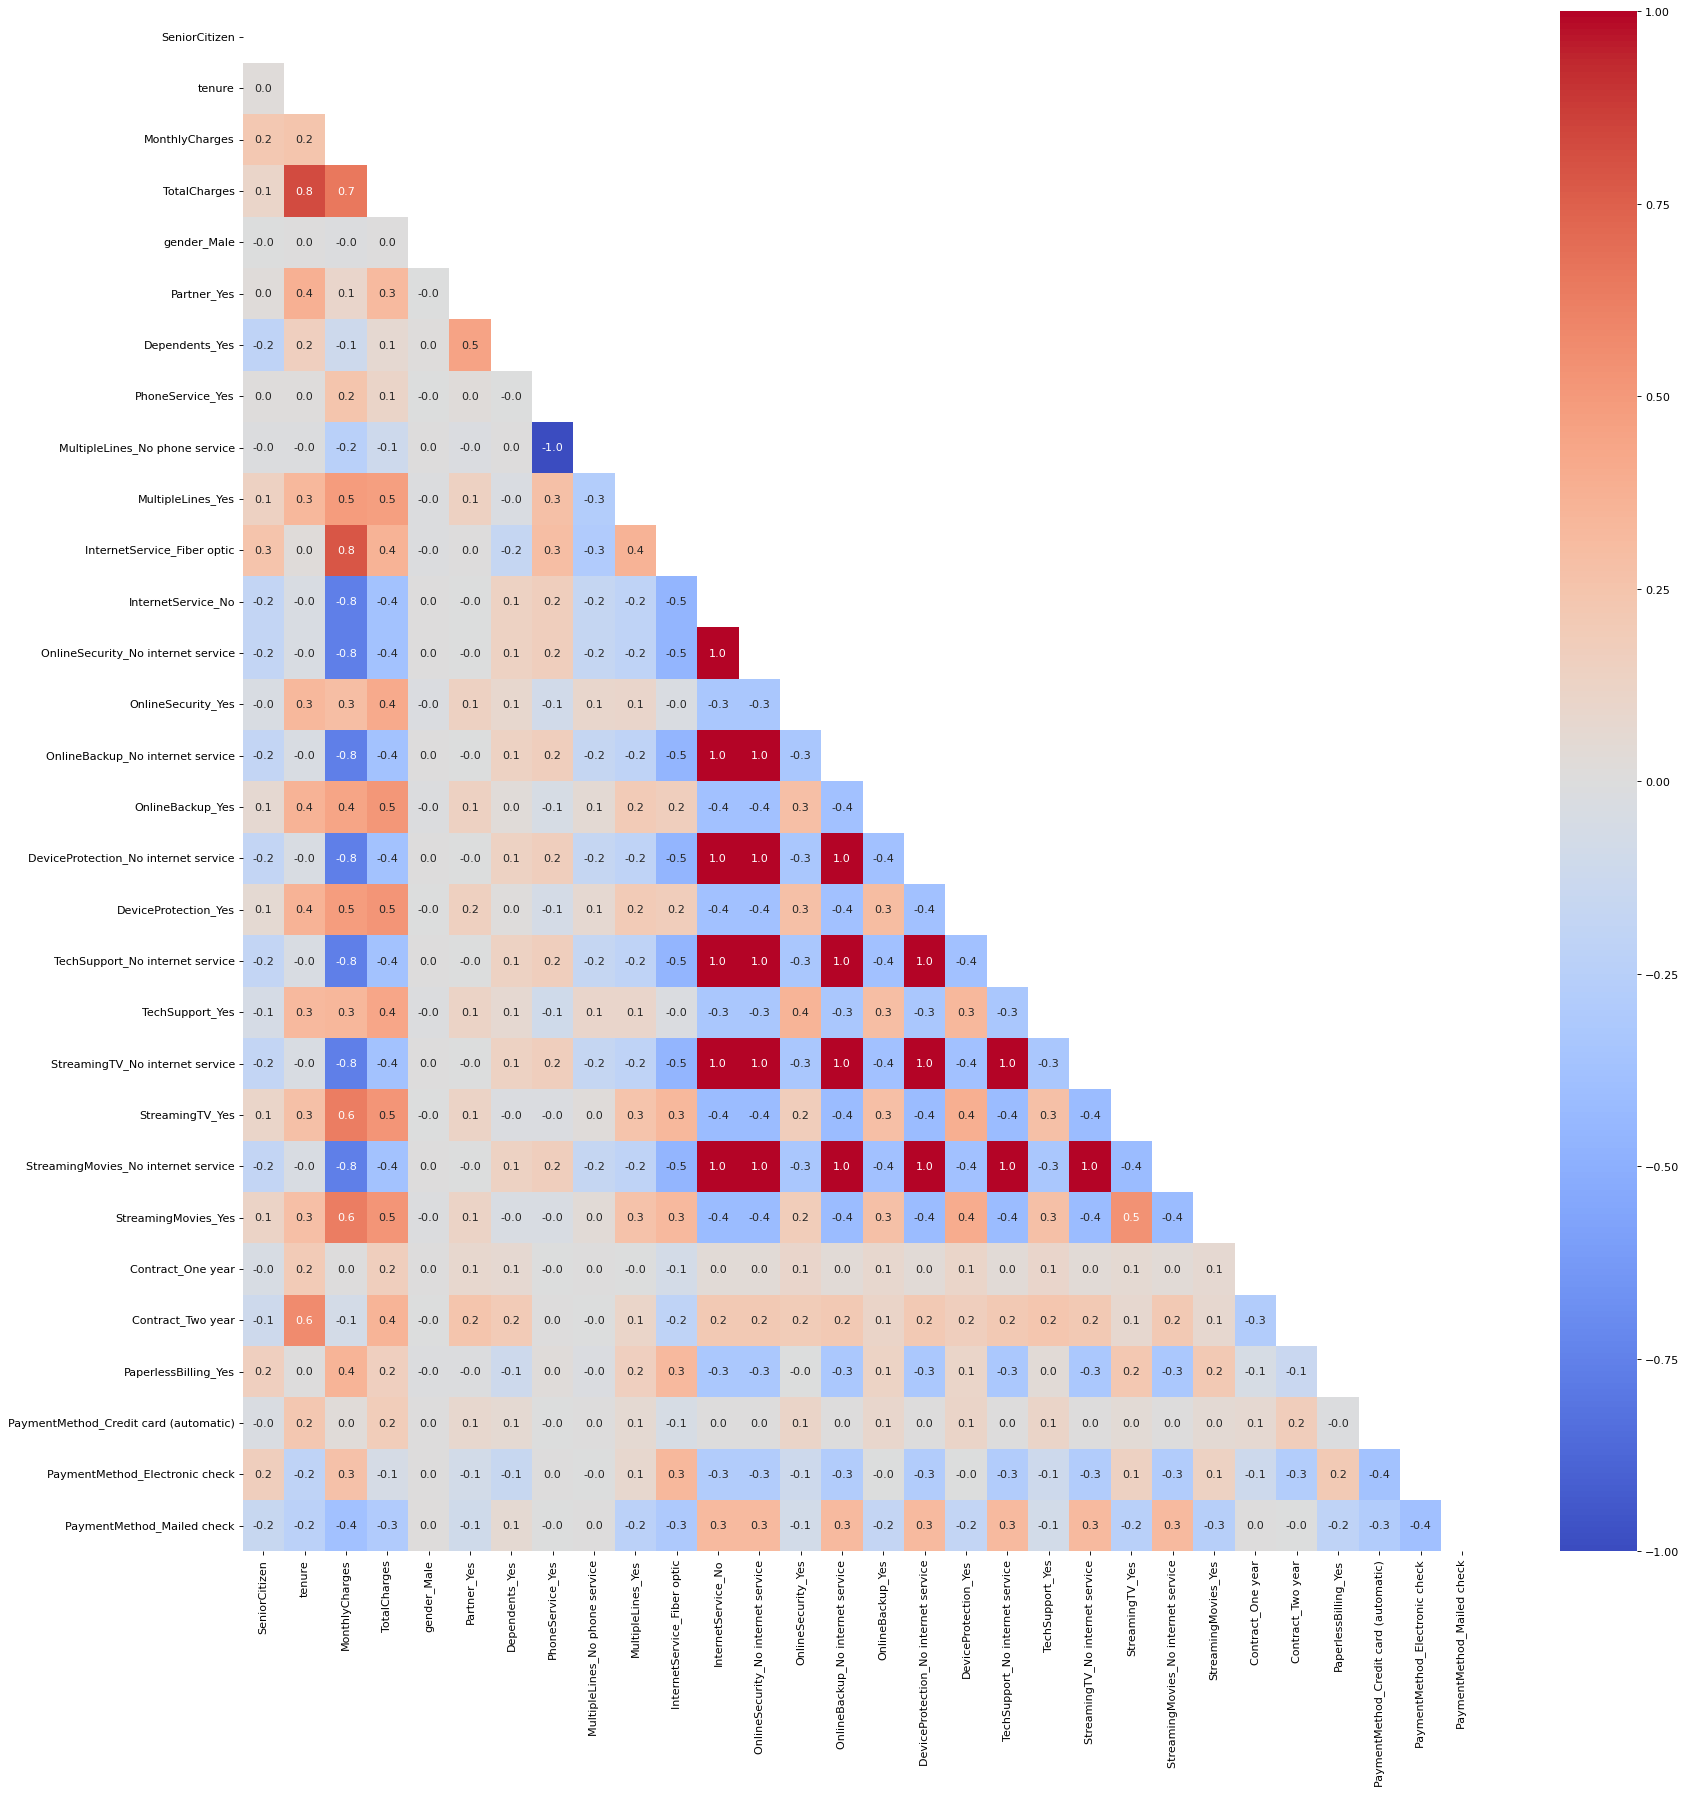

In [55]:
# check correlation between variables

matrix = np.triu(np.ones_like(data.corr()))
fig, ax = plt.subplots(figsize=(25,25),dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(data.corr(), mask= matrix, cmap="coolwarm", annot = True, fmt = '.1f', center = 0,annot_kws={"fontsize":10})

In [56]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [57]:
data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)


In [58]:
# Separate the response variable and predictor variables
y1 = data["Churn"]
X1 = data.drop("Churn", axis=1)

# Add a constant to the predictor variables for the intercept term
#X1 = sm.add_constant(X1)

# Fit a logistic regression model with all predictors
model = sm.Logit(y1, X1).fit()

# Calculate VIF values
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["Predictor"] = X1.columns

# Print the VIF values
print(vif)

Optimization terminated successfully.
         Current function value: 0.414269
         Iterations 8
     VIF Factor                              Predictor
0      1.153220                          SeniorCitizen
1      7.584453                                 tenure
2    866.089640                         MonthlyCharges
3     10.811490                           TotalCharges
4      1.002106                            gender_Male
5      1.462988                            Partner_Yes
6      1.381598                         Dependents_Yes
7   1773.528816                       PhoneService_Yes
8     60.842267         MultipleLines_No phone service
9      7.289761                      MultipleLines_Yes
10   148.500814            InternetService_Fiber optic
11          inf                     InternetService_No
12          inf     OnlineSecurity_No internet service
13     6.338349                     OnlineSecurity_Yes
14          inf       OnlineBackup_No internet service
15     6.796678   

In [59]:
# multiply col1 and col2 to create a new column
data['total'] = data['tenure'] * data['MonthlyCharges']


In [60]:
(data['total']== data['TotalCharges']).value_counts()[False]

6418

In [61]:
df=data[["total", "TotalCharges"]]
print(df)

        total  TotalCharges
0       29.85         29.85
1     1936.30       1889.50
2      107.70        108.15
3     1903.50       1840.75
4      141.40        151.65
...       ...           ...
7027  2035.20       1990.50
7028  7430.40       7362.90
7029   325.60        346.45
7030   297.60        306.60
7031  6972.90       6844.50

[7032 rows x 2 columns]


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int32  
 5   gender_Male                            7032 non-null   uint8  
 6   Partner_Yes                            7032 non-null   uint8  
 7   Dependents_Yes                         7032 non-null   uint8  
 8   PhoneService_Yes                       7032 non-null   uint8  
 9   MultipleLines_No phone service         7032 non-null   uint8  
 10  MultipleLines_Yes                      7032 non-null   uint8  
 11  Inte

In [63]:
# Drop CustomerID and other columns not required

data.drop(columns=['total'], inplace=True)
tel_cus_df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

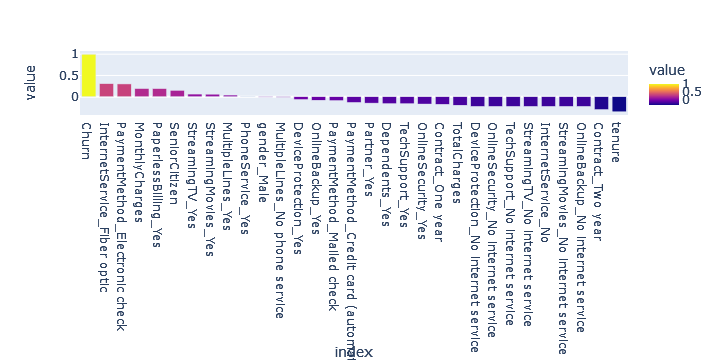

In [64]:
#Now we can see the correlation of all selected features with churn label:

fig = px.bar(data.corr()['Churn'].sort_values(ascending = False),
             color = 'value')
fig.show()

In [65]:


#We see that our data is unbalanced and we have more data about customers who are not in churn.

data.groupby('Churn')['Churn'].count()



Churn
0    5163
1    1869
Name: Churn, dtype: int64

In [66]:

x = data.drop("Churn", axis = 1).values
y = data['Churn'].values


In [67]:
#We will use the Synthetic Minority Oversampling technique in order to balance our classes

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =2, test_size = 0.2)
over = SMOTE(sampling_strategy = 1)
x_train,y_train = over.fit_resample(x,y)

In [68]:
# Get the variable names
variable_names = data.columns.tolist()
print(variable_names)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [70]:
# building models

def model(method, x_train, y_train, x_test, y_test):
    # Scale the training and test data
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Train the model on the training data
    method.fit(x_train, y_train)
    
    # Make predictions on training and test data
    train_predictions = method.predict(x_train)
    test_predictions = method.predict(x_test)
    
    # Calculate confusion matrix for test data
    test_c_matrix = confusion_matrix(y_test, test_predictions)
    
    # Calculate label percentages and create label strings with counts and percentages for test data
    test_percentages = (test_c_matrix / np.sum(test_c_matrix, axis=1)[:, np.newaxis]).round(2) * 100
    test_labels = [[f"{test_c_matrix[i, j]} ({test_percentages[i, j]:.2f}%)" for j in range(test_c_matrix.shape[1])] for i in range(test_c_matrix.shape[0])]
    test_labels = np.asarray(test_labels)
    
    # Plot confusion matrix with labeled counts and percentages for test data
    sns.heatmap(test_c_matrix, annot=test_labels, fmt='', cmap='Blues')
    
    # Evaluate model performance and print results for training and test data
    print("Training ROC AUC: ", '{:.2%}'.format(roc_auc_score(y_train, train_predictions)))
    print("Training accuracy: ", '{:.2%}'.format(accuracy_score(y_train, train_predictions)))
    print(classification_report(y_train, train_predictions))
    
    print("Test ROC AUC: ", '{:.2%}'.format(roc_auc_score(y_test, test_predictions)))
    print("Test accuracy: ", '{:.2%}'.format(accuracy_score(y_test, test_predictions)))
    print(classification_report(y_test, test_predictions))
    
    # Plot feature importance values
    #importances = method.feature_importances_
    #feat_importances = pd.Series(importances, index=x_train.columns)
    #feat_importances.nlargest(20).plot(kind='barh')
    #plt.title('Feature Importance')

In [71]:
# create a logistic regression model with ridge regularization
logridge = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)

Training ROC AUC:  72.57%
Training accuracy:  80.53%
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4130
           1       0.66      0.56      0.60      1495

    accuracy                           0.81      5625
   macro avg       0.75      0.73      0.74      5625
weighted avg       0.80      0.81      0.80      5625

Test ROC AUC:  73.30%
Test accuracy:  80.45%
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.58      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



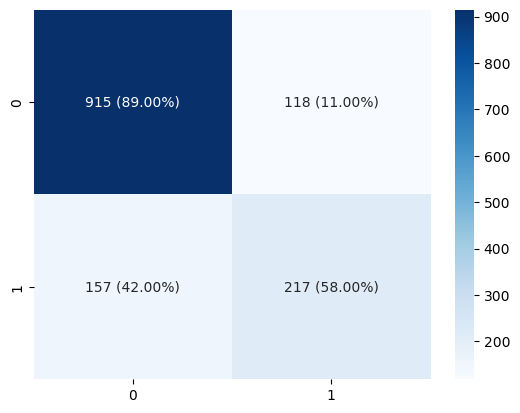

In [72]:
model(logridge,x_train,y_train,x_test,y_test)

In [73]:
loglasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

Training ROC AUC:  72.52%
Training accuracy:  80.52%
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4130
           1       0.66      0.55      0.60      1495

    accuracy                           0.81      5625
   macro avg       0.75      0.73      0.74      5625
weighted avg       0.80      0.81      0.80      5625

Test ROC AUC:  73.21%
Test accuracy:  80.45%
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.58      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



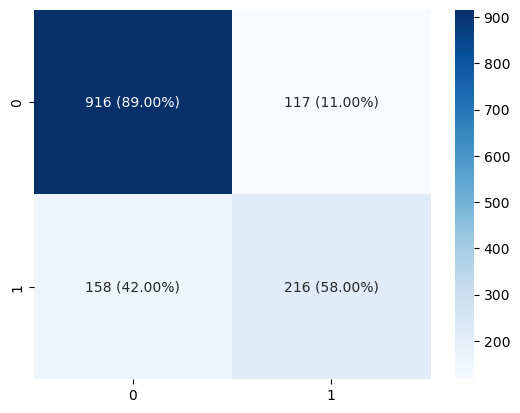

In [74]:
model(loglasso,x_train,y_train,x_test,y_test)

Training ROC AUC:  72.51%
Training accuracy:  80.50%
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4130
           1       0.66      0.55      0.60      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.73      0.74      5625
weighted avg       0.80      0.80      0.80      5625

Test ROC AUC:  73.21%
Test accuracy:  80.45%
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.58      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



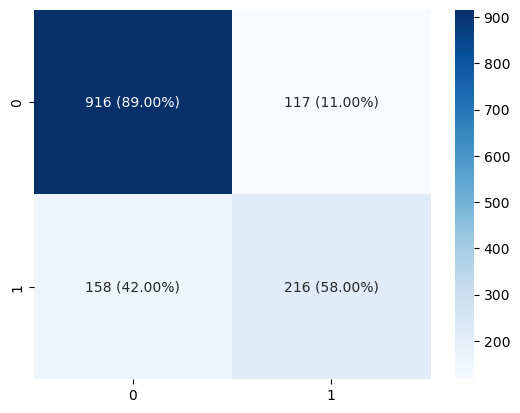

In [75]:
logEN = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42)
model(logEN,x_train,y_train,x_test,y_test)

In [76]:


#We will use Extreme Gradient Boosting Classifier

xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)



Training ROC AUC:  73.52%
Training accuracy:  82.20%
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4130
           1       0.71      0.55      0.62      1495

    accuracy                           0.82      5625
   macro avg       0.78      0.74      0.75      5625
weighted avg       0.81      0.82      0.81      5625

Test ROC AUC:  72.09%
Test accuracy:  80.31%
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.55      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



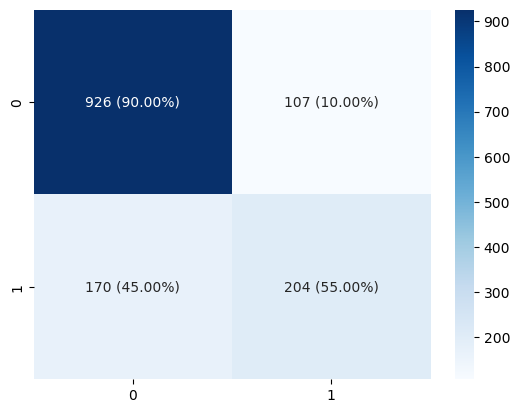

In [77]:
model(xgb,x_train,y_train,x_test,y_test)

In [78]:
logreg = LogisticRegression(random_state=42)

Training ROC AUC:  72.57%
Training accuracy:  80.53%
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4130
           1       0.66      0.56      0.60      1495

    accuracy                           0.81      5625
   macro avg       0.75      0.73      0.74      5625
weighted avg       0.80      0.81      0.80      5625

Test ROC AUC:  73.30%
Test accuracy:  80.45%
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.58      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



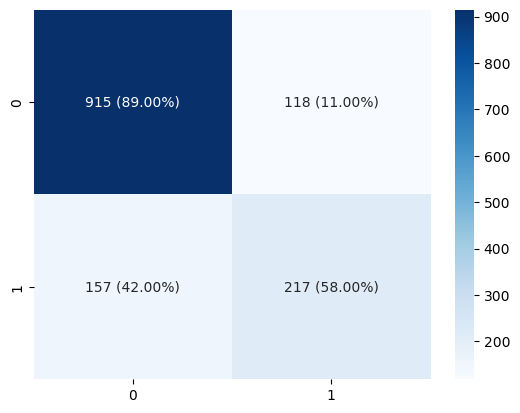

In [79]:
model(logreg,x_train,y_train,x_test,y_test)

In [80]:
rf = RandomForestClassifier(random_state=42)

Training ROC AUC:  99.64%
Training accuracy:  99.75%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      0.99      1.00      1495

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625

Test ROC AUC:  70.04%
Test accuracy:  79.18%
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



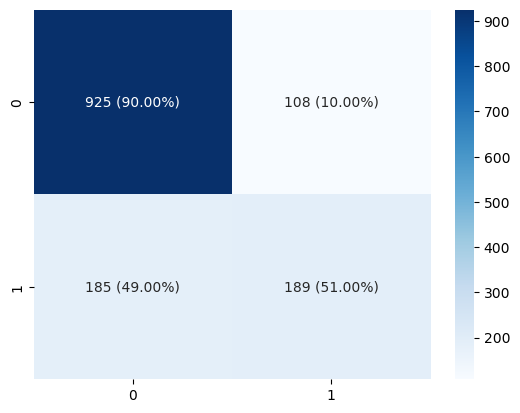

In [81]:
model(rf,x_train,y_train,x_test,y_test)

Training ROC AUC:  71.81%
Training accuracy:  80.16%
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4130
           1       0.65      0.54      0.59      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.79      0.80      0.80      5625

Test ROC AUC:  72.00%
Test accuracy:  79.67%
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.63      0.56      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



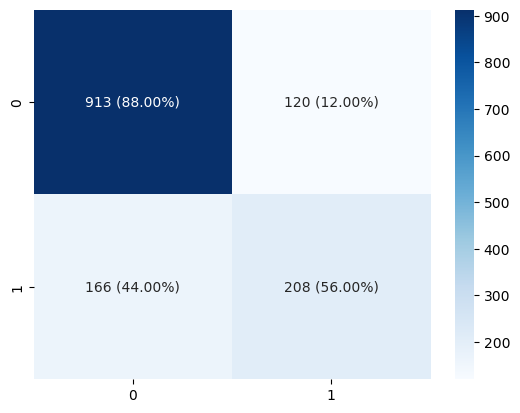

In [82]:
svm = SVC(kernel='linear', C=1, random_state=42)
model(svm,x_train,y_train,x_test,y_test)

Training ROC AUC:  80.83%
Training accuracy:  85.88%
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4130
           1       0.75      0.70      0.73      1495

    accuracy                           0.86      5625
   macro avg       0.82      0.81      0.82      5625
weighted avg       0.86      0.86      0.86      5625

Test ROC AUC:  67.72%
Test accuracy:  75.27%
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1033
           1       0.54      0.52      0.53       374

    accuracy                           0.75      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.75      0.75      1407



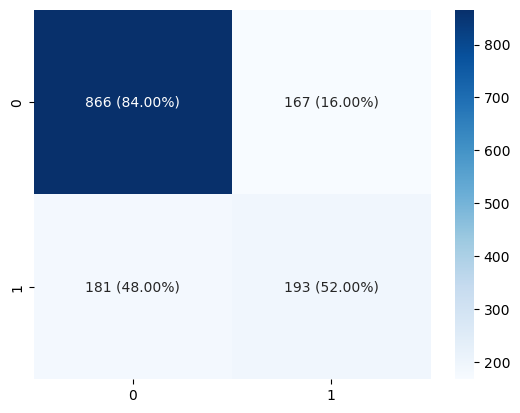

In [83]:
knn = KNeighborsClassifier(n_neighbors=3)
model(knn,x_train,y_train,x_test,y_test)

Training ROC AUC:  72.42%
Training accuracy:  80.09%
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4130
           1       0.64      0.56      0.60      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.79      0.80      0.80      5625

Test ROC AUC:  71.99%
Test accuracy:  79.03%
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1033
           1       0.61      0.57      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407



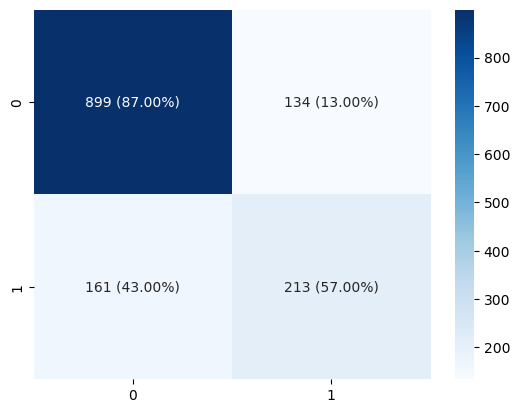

In [84]:
lda = LinearDiscriminantAnalysis()
model(lda,x_train,y_train,x_test,y_test)

Training ROC AUC:  74.65%
Training accuracy:  82.95%
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4130
           1       0.73      0.57      0.64      1495

    accuracy                           0.83      5625
   macro avg       0.79      0.75      0.76      5625
weighted avg       0.82      0.83      0.82      5625

Test ROC AUC:  72.25%
Test accuracy:  80.17%
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



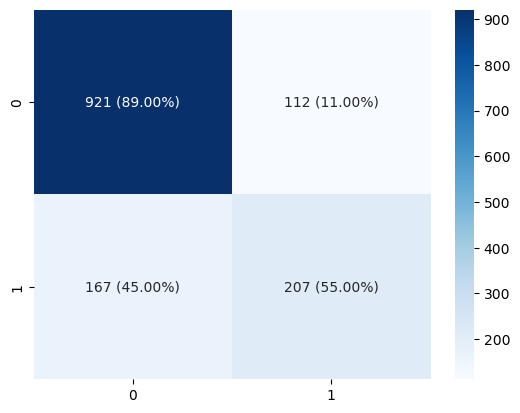

In [85]:
GB = GradientBoostingClassifier(random_state=42)
model(GB,x_train,y_train,x_test,y_test)

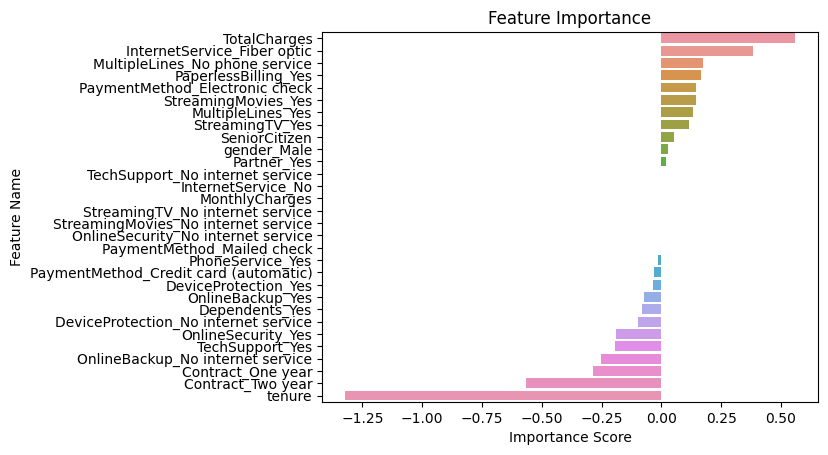

In [86]:
# Get feature importance
feat_importances = loglasso.coef_[0]

# Get column names
feature_names = feature_names = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
                    'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 
                   'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 
                   'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
                   'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service',
                   'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 
                   'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 
                   'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 
                   'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
loadings = pls.x_loadings_

# Create a Pandas DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'feature_name': feature_names, 'importance_score': feat_importances})

# Sort the features by their importance scores
feature_importance_df = feature_importance_df.sort_values('importance_score', ascending=False)

# Plot the feature importance
sns.barplot(x='importance_score', y='feature_name', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

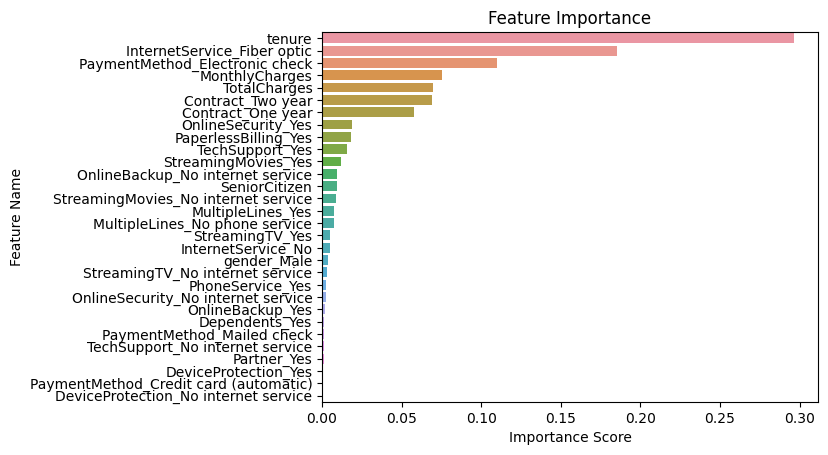

In [87]:
# Train the model on the training data
GB.fit(x_train, y_train)

# Get feature importance
feat_importances = GB.feature_importances_
# Get column names
feature_names = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
                    'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 
                   'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 
                   'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
                   'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service',
                   'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 
                   'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 
                   'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 
                   'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
loadings = pls.x_loadings_
# Create a Pandas DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'feature_name': feature_names, 'importance_score': feat_importances})

# Sort the features by their importance scores
feature_importance_df = feature_importance_df.sort_values('importance_score', ascending=False)

# Plot the feature importance
sns.barplot(x='importance_score', y='feature_name', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()


In [88]:
# Define your models
models = [
    ('GB', GradientBoostingClassifier(random_state=42)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    #('SVM', SVC(kernel='linear', C=1, random_state=42)),
    ('RF', RandomForestClassifier(random_state=42)),
    ('LogReg', LogisticRegression(random_state=42)),
    ('XGB', XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000)),
    ('LogEN', LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42)),
    ('LogLasso', LogisticRegression(penalty='l1', solver='liblinear', random_state=42)),
    ('LogRidge', LogisticRegression(penalty='l2', solver='liblinear', random_state=42))
]

# Create a dataframe to store the results
results = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'CV Accuracy', 'CV Std'])

# Loop over each model and perform 10-fold cross-validation
for name, model in models:
    # Train the model on the training set
    model.fit(x_train, y_train)
    
    # Calculate the training accuracy
    y_train_pred = model.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Calculate the test accuracy
    y_test_pred = model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Perform 10-fold cross-validation and calculate the cross-validation accuracy and standard deviation
    scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
    cv_accuracy = scores.mean()
    cv_std = scores.std()
    
    # Add the results to the dataframe
    results = results.append({'Model': name, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy,
                              'CV Accuracy': cv_accuracy, 'CV Std': cv_std}, ignore_index=True)

# Print the results as a table
print(results.to_string(index=False))

<ipython-input-88-59e390ed9e28>:37: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-88-59e390ed9e28>:37: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-88-59e390ed9e28>:37: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-88-59e390ed9e28>:37: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Plea

   Model  Train Accuracy  Test Accuracy  CV Accuracy   CV Std
      GB        0.829511       0.801706     0.799641 0.018233
     LDA        0.800889       0.790334     0.799283 0.020790
     KNN        0.831111       0.766880     0.763731 0.010305
      RF        0.997511       0.791756     0.786842 0.011792
  LogReg        0.805156       0.801706     0.803197 0.021893
     XGB        0.822044       0.803127     0.802308 0.014720
   LogEN        0.758044       0.779673     0.756616 0.017722
LogLasso        0.805511       0.805970     0.803019 0.024270
LogRidge        0.805689       0.803838     0.803197 0.022879
